### Классификация
#### 1. Импортируем библиотеки и датасет (геометрические свойства трех видов пшеницы).

In [22]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, plotly.express as px
from sklearn import tree,ensemble,model_selection,metrics,neighbors
from warnings import filterwarnings as fw
fw('ignore')

In [23]:
data = pd.read_csv('red.csv')
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Отберем в отдельные датафреймы характеристики объектов и метки классов. 
<br>Затем поделим датасет на обучающую и тестовую выборки в классическом соотношении 1:4.

In [24]:
x = data.iloc[:,:11]
y = data.iloc[:,11:]
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.2)
print('xtrain: ', xtrain.shape, 'ytrain: ', ytrain.shape, '\nxtest: ', xtest.shape, 'ytest: ', ytest.shape)
ytest=ytest.to_numpy().flatten()

xtrain:  (1279, 11) ytrain:  (1279, 1) 
xtest:  (320, 11) ytest:  (320, 1)


#### 2. Построим дерево решений со значениями по умолчанию.

Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [25]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.07143   0.09091   0.08000        11
           5    0.67669   0.64748   0.66176       139
           6    0.66942   0.61364   0.64032       132
           7    0.59524   0.71429   0.64935        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.61562       320
   macro avg    0.33546   0.34439   0.33857       320
weighted avg    0.63763   0.61562   0.62536       320

AUC (area under ROC curve) =  0.623570894608339


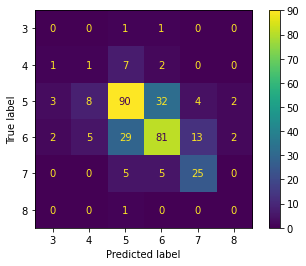

In [26]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [27]:
for i in range(11):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

FixedAcidity  -  0.06978758596240321
VolatileAcidity  -  0.09779482906837653
CitricAcid  -  0.04208271312211413
ResidualSugar  -  0.088109432929675
Chlorides  -  0.0654873762263041
FreeSulfurDioxide  -  0.05673743336938303
TotalSulfurDioxide  -  0.10119214432552995
Density  -  0.07081936510222177
pH  -  0.09951170332546098
Sulphates  -  0.11625366648315241
Alcohol  -  0.1922237500853788


Дерево решений:

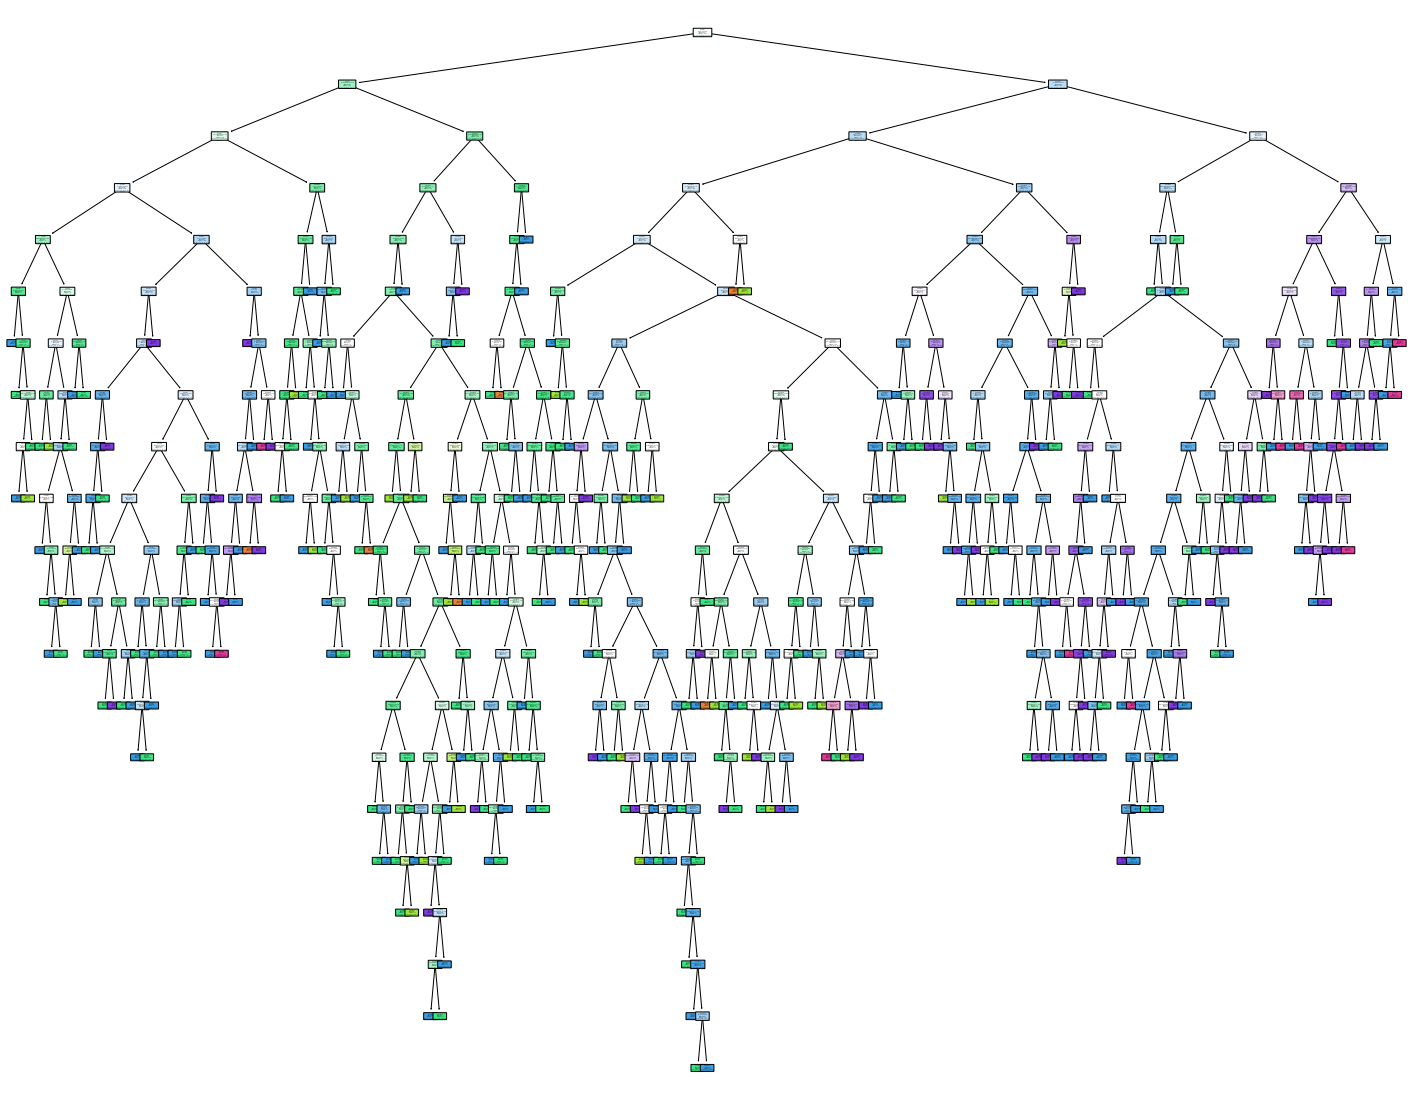

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol'],  
                   class_names=['1','2','3','4','5','6','7','8','9','10'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с максимальной числом уровней в 2.

In [29]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.58182   0.69065   0.63158       139
           6    0.47742   0.56061   0.51568       132
           7    0.00000   0.00000   0.00000        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.53125       320
   macro avg    0.17654   0.20854   0.19121       320
weighted avg    0.44966   0.53125   0.48706       320

AUC (area under ROC curve) =  0.6228323641949812


Матрица ошибок:

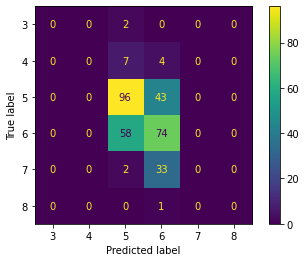

In [30]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [31]:
for i in range(11):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

VolatileAcidity  -  0.13468836614635105
Sulphates  -  0.1266705977611357
Alcohol  -  0.7386410360925132


Дерево решений:

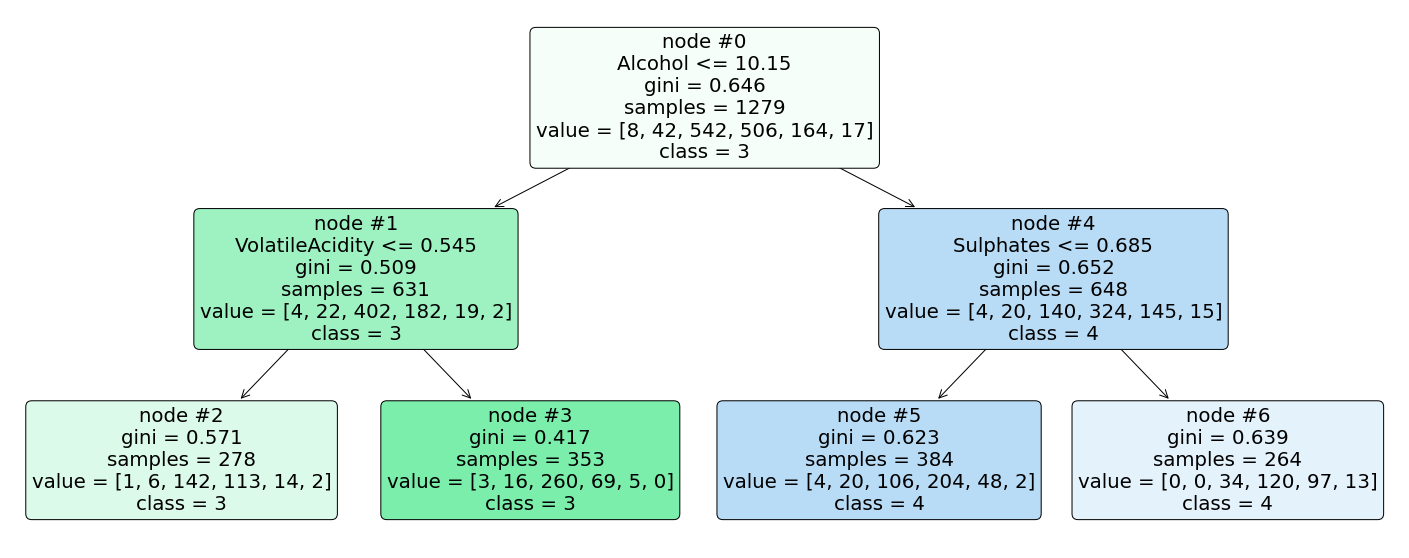

In [32]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(DTC, 
                   feature_names=['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol'],  
                   class_names=['1','2','3','4','5','6','7','8','9','10'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с минимальным числом объектов узла в 6.

In [33]:
DTC = tree.DecisionTreeClassifier(min_samples_leaf=10)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.23529   0.36364   0.28571        11
           5    0.68148   0.66187   0.67153       139
           6    0.63025   0.56818   0.59761       132
           7    0.46939   0.65714   0.54762        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.60625       320
   macro avg    0.33607   0.37514   0.35041       320
weighted avg    0.61543   0.60625   0.60793       320

AUC (area under ROC curve) =  0.6593193778602262


Матрица ошибок:

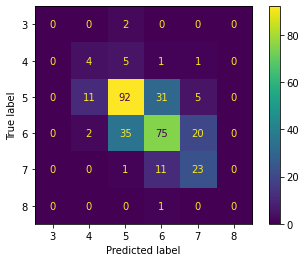

In [34]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [35]:
for i in range(11):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

FixedAcidity  -  0.007629881714850681
VolatileAcidity  -  0.14999772048293555
CitricAcid  -  0.010858231966311046
ResidualSugar  -  0.07029567753855306
Chlorides  -  0.03162819605084121
FreeSulfurDioxide  -  0.07001365300577043
TotalSulfurDioxide  -  0.12393897024813613
Density  -  0.04029817747812243
pH  -  0.049626976315429235
Sulphates  -  0.12116275524961652
Alcohol  -  0.32454975994943375


Дерево решений:

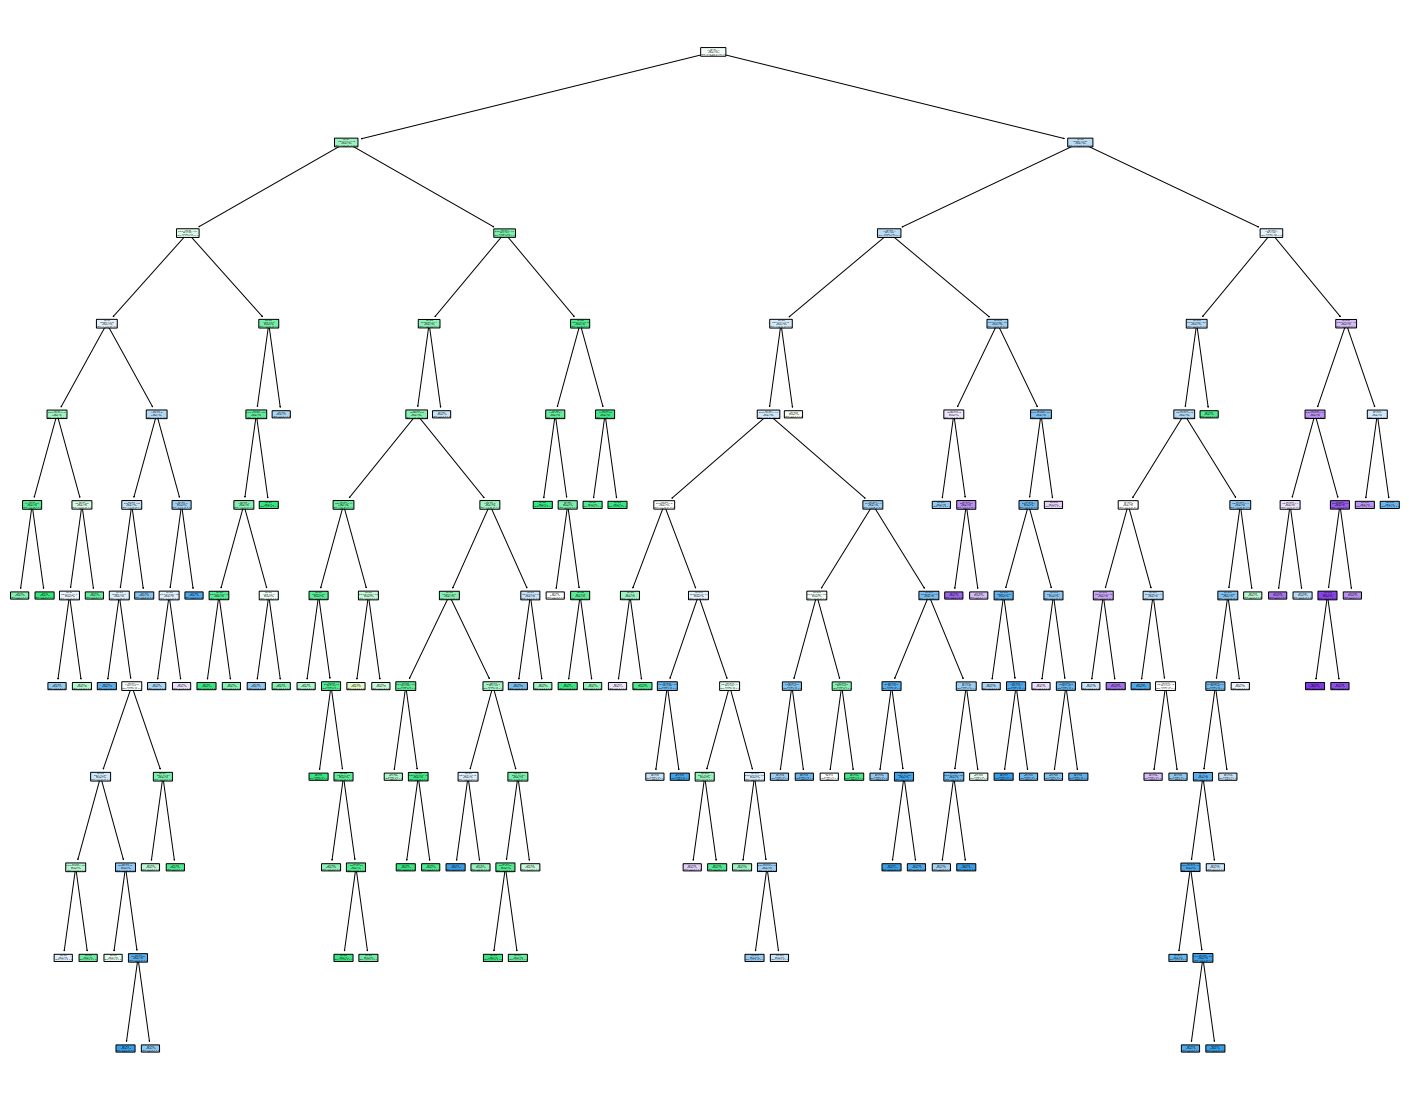

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol'],  
                   class_names=['1','2','3','4','5','6','7','8','9','10'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

#### 3. Модель RandomForest.

##### Построим модель на значениях по умолчанию: 100 деревьев, sqrt(n) параметров, полные деревья.

In [37]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.72917   0.75540   0.74205       139
           6    0.67123   0.74242   0.70504       132
           7    0.76923   0.57143   0.65574        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.69688       320
   macro avg    0.36161   0.34487   0.35047       320
weighted avg    0.67775   0.69688   0.68488       320

AUC (area under ROC curve) =  0.8673435217525917


##### Построим модель, сократив количество деревьев вдвое: 50 деревьев, sqrt(n) параметров, полные деревья.

In [38]:
RFC = ensemble.RandomForestClassifier(n_estimators=50)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.71528   0.74101   0.72792       139
           6    0.66234   0.77273   0.71329       132
           7    0.94737   0.51429   0.66667        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.69688       320
   macro avg    0.38750   0.33800   0.35131       320
weighted avg    0.68753   0.69688   0.68334       320

AUC (area under ROC curve) =  0.8314584774933763


##### Построим модель, расширив максимальное количество параметров до 7: 100 деревьев, все параметры, полные деревья.

In [39]:
RFC = ensemble.RandomForestClassifier(max_features=7)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.75000   0.75540   0.75269       139
           6    0.67785   0.76515   0.71886       132
           7    0.74074   0.57143   0.64516        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.70625       320
   macro avg    0.36143   0.34866   0.35279       320
weighted avg    0.68641   0.70625   0.69404       320

AUC (area under ROC curve) =  0.7777438543843717


##### Построим модель, сократив число уровней деревьев: 100 деревьев, sqrt(n) параметров, деревья с числом уровней не более 2.

In [40]:
RFC = ensemble.RandomForestClassifier(max_depth=2)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.63636   0.75540   0.69079       139
           6    0.53548   0.62879   0.57840       132
           7    0.00000   0.00000   0.00000        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.58750       320
   macro avg    0.19531   0.23070   0.21153       320
weighted avg    0.49731   0.58750   0.53865       320

AUC (area under ROC curve) =  0.787619386447016


##### Для модели с наибольшей оценкой (со значениями по умолчанию) построим три дерева, входящих в нее.

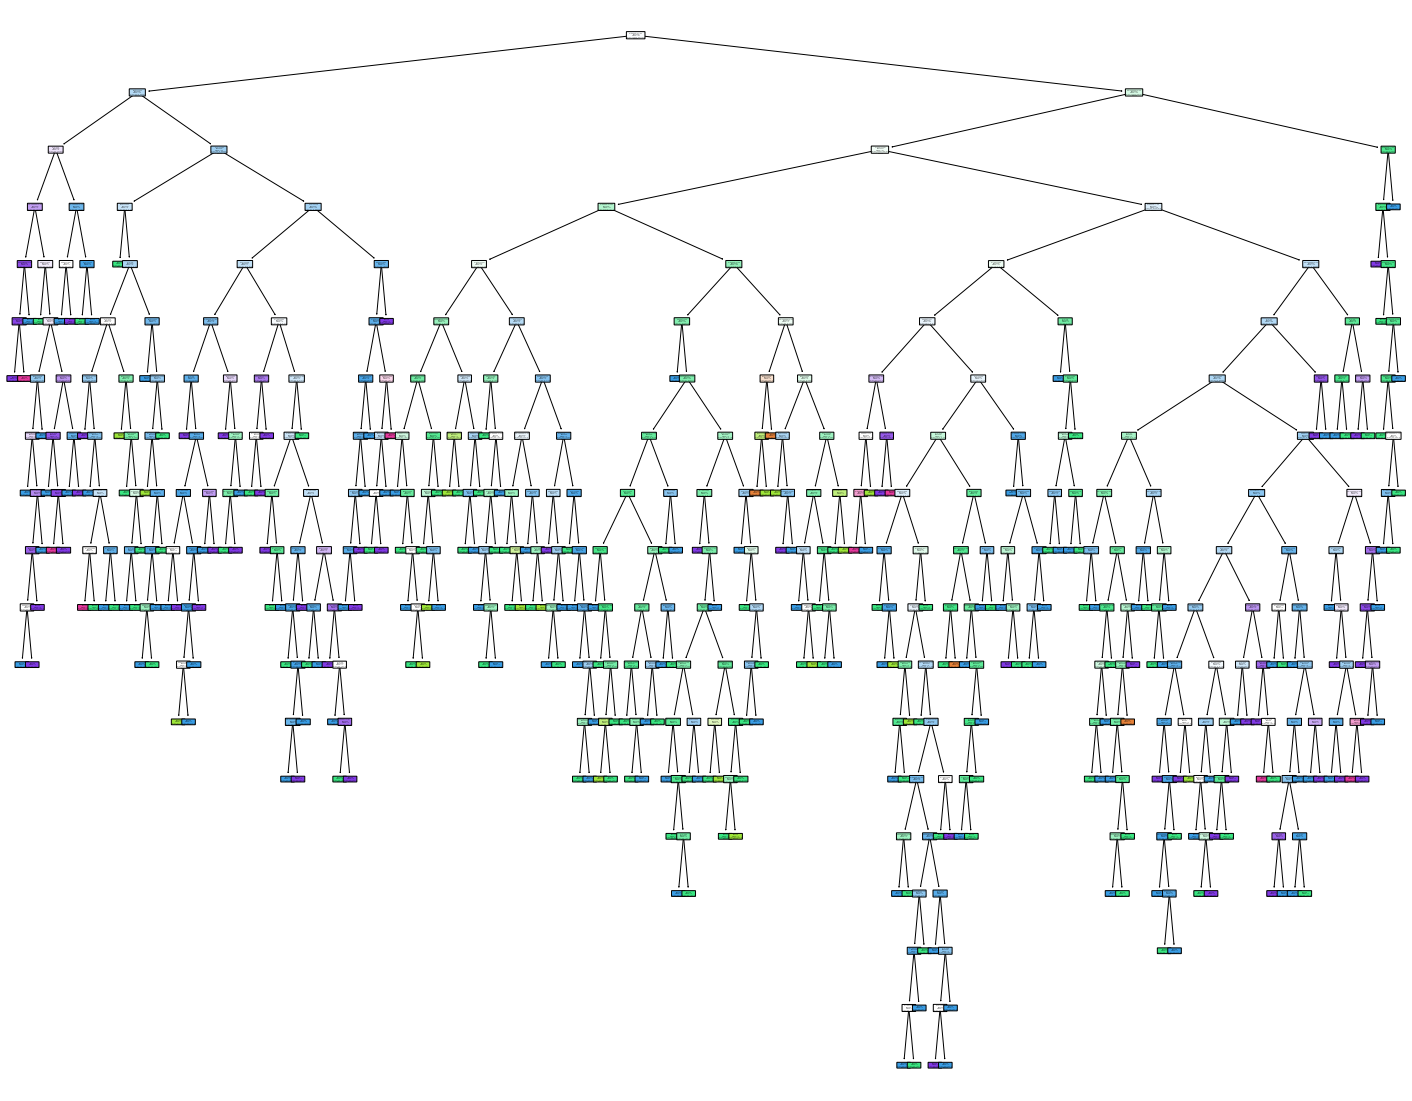

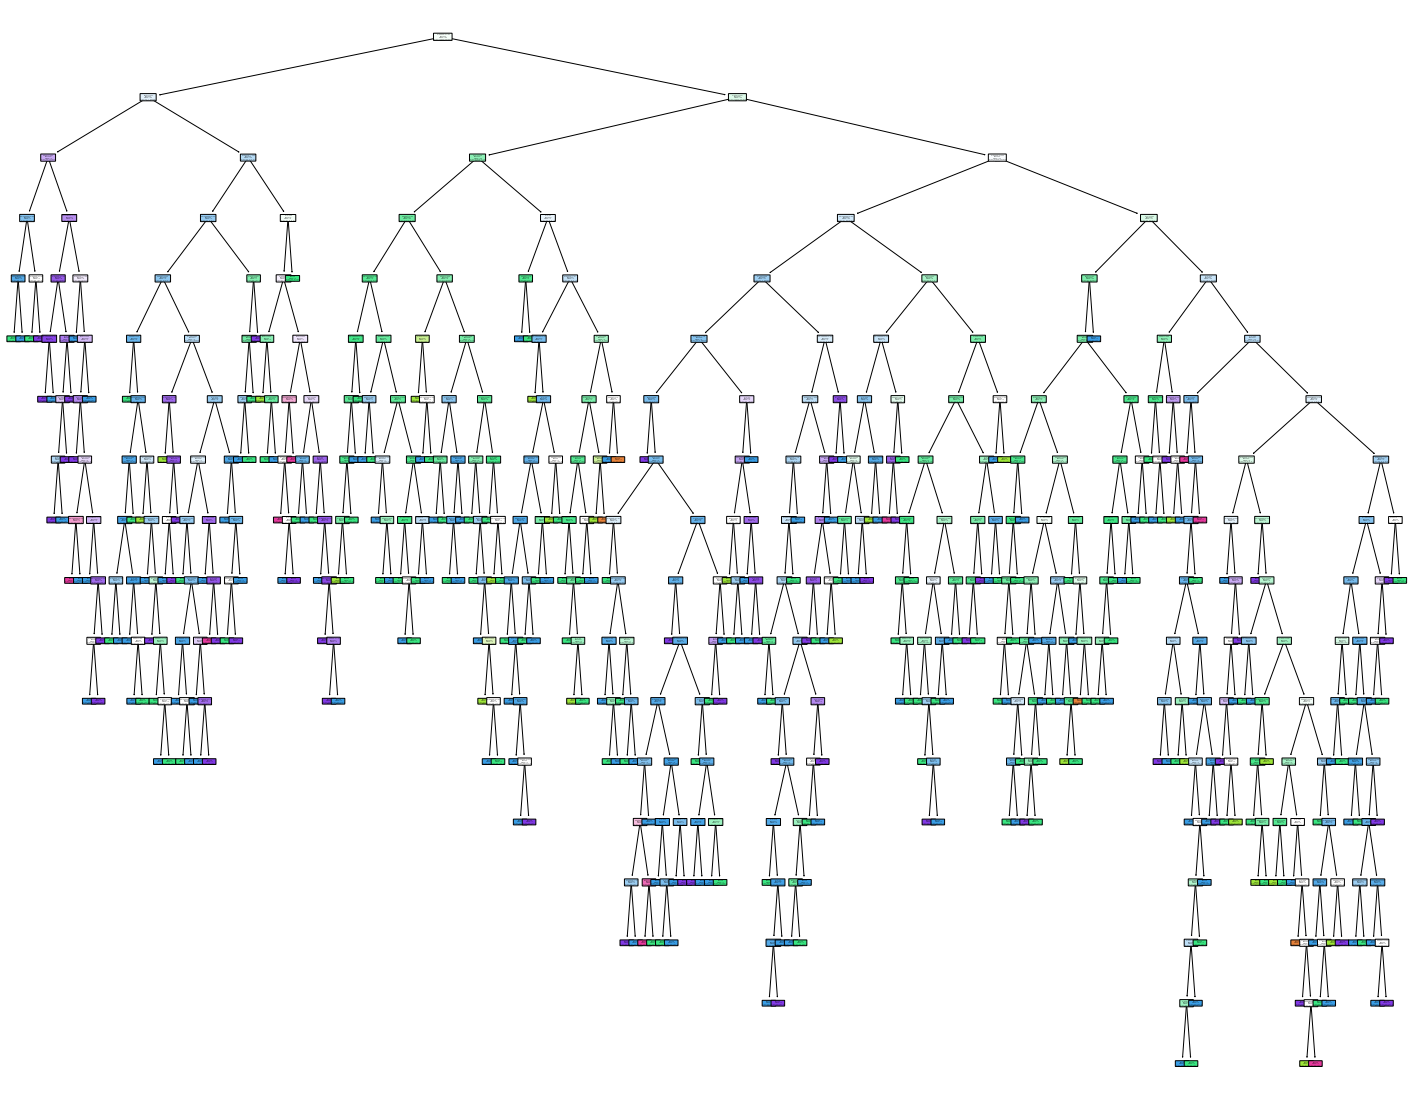

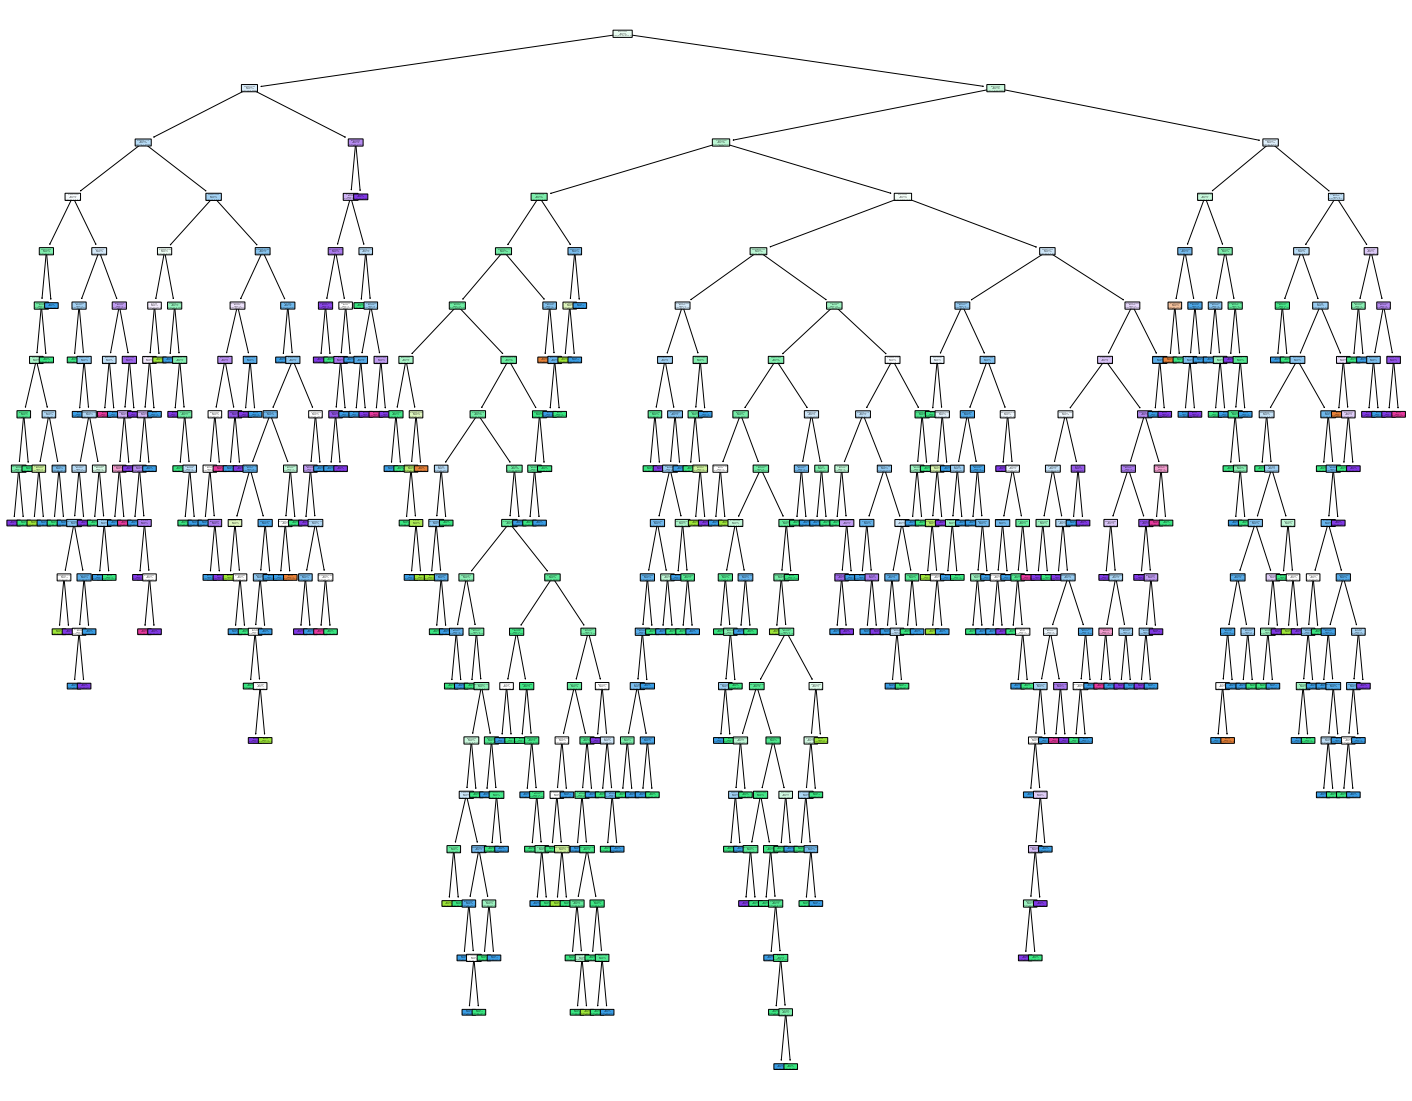

In [41]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())

for i in range(3):
    fig = plt.figure(figsize=(25,20))
    a = tree.plot_tree(RFC.estimators_[i*49], 
                    feature_names=['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol'],  
                   class_names=['1','2','3','4','5','6','7','8','9','10'],
                    filled=True,
                    rounded=True)

#### 4. Оценим важность показателей с помощью RandomForest.

In [42]:
for i in range(11):
    print(data.columns[i], ' - ', RFC.feature_importances_[i])

FixedAcidity  -  0.07408964787521462
VolatileAcidity  -  0.10497476865909385
CitricAcid  -  0.07030687965641134
ResidualSugar  -  0.07163562727126851
Chlorides  -  0.07933670208643102
FreeSulfurDioxide  -  0.07103634418106215
TotalSulfurDioxide  -  0.1057561637668917
Density  -  0.09073220490250508
pH  -  0.07466868718398972
Sulphates  -  0.1058603113988125
Alcohol  -  0.1516026630183196


Таким образом, наши показатели в порядке убывания важности:
<br> groovelength > perimeter > area > kernelwidth > kernellength > assymetry > compactness
<br> Построим диаграммы размаха для трех наиболее важных показателей.

In [44]:
px.box(data[['Alcohol','Quality']], x='Quality', y='Alcohol', title='Alcohol distribution by Quality')

In [45]:
px.box(data[['Sulphates','Quality']], x='Quality', y='Sulphates', title='Sulphates distribution by Quality')

In [47]:
px.box(data[['TotalSulfurDioxide','Quality']], x='Quality', y='TotalSulfurDioxide', title='TotalSulfurDioxide distribution by Quality')

Построим scatterplot для двух наиболее важных показателей для наглядной иллюстрации классов.

In [49]:
px.scatter(data,x=data['Alcohol'],y=data['TotalSulfurDioxide'],color=data['Quality'])

Построим scatterplot для показателей area и perimeter для иллюстрации возможности линейного деления на классы по двум параметрам (но с малой точностью).

In [ ]:
px.scatter(data,x=data['area'],y=data['perimeter'],color=data['class'])

#### 5. Построение моделей Decision tree на полном наборе показателей, на 20% самых важных, на 80% наименее важных.

In [ ]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.76471   0.86667   0.81250        15
           2    1.00000   0.85714   0.92308        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.85665   0.86058        42
weighted avg    0.86835   0.85714   0.85978        42

AUC (area under ROC curve) =  0.8921416174289738


In [ ]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['groovelength','perimeter']],ytrain)
ypred = DTC.predict(xtest[['groovelength','perimeter']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['groovelength','perimeter']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.83333   1.00000   0.90909        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   0.92308   0.96000        13

    accuracy                        0.92857        42
   macro avg    0.94444   0.92674   0.93072        42
weighted avg    0.94048   0.92857   0.92951        42

AUC (area under ROC curve) =  0.9448514448514449


In [ ]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['area','compactness','kernellength','kernelwidth','assymetry']],ytrain)
ypred = DTC.predict(xtest[['area','compactness','kernellength','kernelwidth','assymetry']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['area','compactness','kernellength','kernelwidth','assymetry']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.75000   0.80000   0.77419        15
           2    0.92308   0.85714   0.88889        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.83333        42
   macro avg    0.83974   0.83443   0.83641        42
weighted avg    0.83745   0.83333   0.83470        42

AUC (area under ROC curve) =  0.8750781253654817


#### 6. Коллективные древовидные модели на базе бустинга: AdaBoost и GradientBoost
Используем AdaBoost со значениями по умолчанию:
<br> Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [51]:
ABC = ensemble.AdaBoostClassifier()
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.10000   0.50000   0.16667         2
           4    0.05797   0.36364   0.10000        11
           5    0.49167   0.42446   0.45560       139
           6    0.61538   0.18182   0.28070       132
           7    0.26761   0.54286   0.35849        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.33437       320
   macro avg    0.25544   0.33546   0.22691       320
weighted avg    0.49930   0.33437   0.35738       320

AUC (area under ROC curve) =  0.6013558404187941


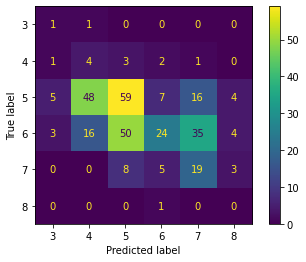

In [52]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Теперь используем дерево решений, построенное в пункте 2 в качестве базового классификатора, чтобы получить лучший результат.

In [53]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
DTCpred = ABC.predict(xtest)
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
ABC = ensemble.AdaBoostClassifier(base_estimator=DTC)
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           3    0.10000   0.50000   0.16667         2
           4    0.05797   0.36364   0.10000        11
           5    0.49167   0.42446   0.45560       139
           6    0.61538   0.18182   0.28070       132
           7    0.26761   0.54286   0.35849        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.33437       320
   macro avg    0.25544   0.33546   0.22691       320
weighted avg    0.49930   0.33437   0.35738       320

AUC (area under ROC curve) =  0.6228323641949812
After boosting: 
              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.04545   0.09091   0.06061        11
           5    0.61224   0.43165   0.50633       139
           6    0.55556   0.49242   0.52209       132
           7    0.08696   0.11429   0.09877        35
           8    0.00000   0.00000   0.00000     

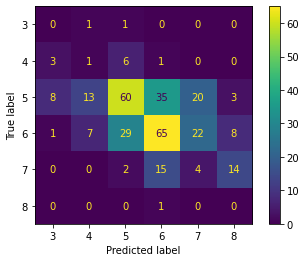

In [54]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Используем GradientBoost со значениями по умолчанию:

In [55]:
GBC = ensemble.GradientBoostingClassifier()
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.25000   0.18182   0.21053        11
           5    0.69536   0.75540   0.72414       139
           6    0.65385   0.64394   0.64885       132
           7    0.65385   0.48571   0.55738        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.65312       320
   macro avg    0.37551   0.34448   0.35682       320
weighted avg    0.65187   0.65312   0.65040       320

AUC (area under ROC curve) =  0.7888771252198769


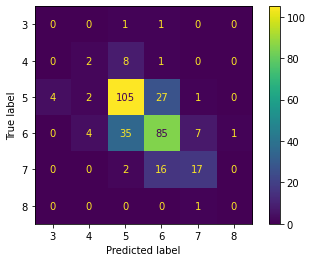

In [56]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()

Теперь используем дерево решений, построенное в пункте 2 в качестве базового классификатора, чтобы получить лучший результат.

In [57]:
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
GBC = ensemble.GradientBoostingClassifier(init=DTC)
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           3    0.10000   0.50000   0.16667         2
           4    0.05797   0.36364   0.10000        11
           5    0.49167   0.42446   0.45560       139
           6    0.61538   0.18182   0.28070       132
           7    0.26761   0.54286   0.35849        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.33437       320
   macro avg    0.25544   0.33546   0.22691       320
weighted avg    0.49930   0.33437   0.35738       320

AUC (area under ROC curve) =  0.6228323641949812
After boosting: 
              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.25000   0.18182   0.21053        11
           5    0.68243   0.72662   0.70383       139
           6    0.62308   0.61364   0.61832       132
           7    0.55172   0.45714   0.50000        35
           8    0.00000   0.00000   0.00000     

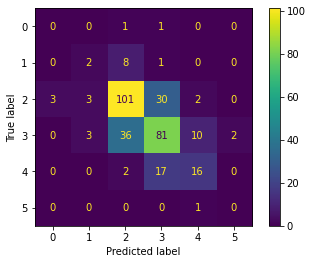

In [58]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()

#### Необязательная, но интересная часть.
Рассмотрим histogram-based grdient boosting classifier

In [59]:
HGBC = ensemble.HistGradientBoostingClassifier()
HGBC.fit(xtrain,ytrain)
HGBCpred = HGBC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,HGBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,HGBC.predict_proba(xtest),average='macro',multi_class='ovr'))

After boosting: 
              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.50000   0.09091   0.15385        11
           5    0.75000   0.77698   0.76325       139
           6    0.68750   0.75000   0.71739       132
           7    0.84615   0.62857   0.72131        35
           8    0.00000   0.00000   0.00000         1

    accuracy                        0.71875       320
   macro avg    0.46394   0.37441   0.39263       320
weighted avg    0.71911   0.71875   0.71164       320

AUC (area under ROC curve) =  0.8406917024118944


##### Проанализируем, имеет ли место переобучение.

In [60]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
DTCpred = DTC.predict(xtrain)
print('On TRAIN data: ')
print(metrics.classification_report(ytrain,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytrain,DTC.predict_proba(xtrain),average='macro',multi_class='ovr'))
DTCpred = DTC.predict(xtest)
print('On TEST data: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

On TRAIN data: 
              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         8
           4    0.00000   0.00000   0.00000        42
           5    0.63708   0.74170   0.68542       542
           6    0.50000   0.64032   0.56153       506
           7    0.00000   0.00000   0.00000       164
           8    0.00000   0.00000   0.00000        17

    accuracy                        0.56763      1279
   macro avg    0.18951   0.23034   0.20782      1279
weighted avg    0.46779   0.56763   0.51261      1279

AUC (area under ROC curve) =  0.7280760713764535
On TEST data: 
              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         2
           4    0.00000   0.00000   0.00000        11
           5    0.58182   0.69065   0.63158       139
           6    0.47742   0.56061   0.51568       132
           7    0.00000   0.00000   0.00000        35
           8    0.00000   0.00000   0.00000         

Можно заметить, что точность классификации на тренировочных данных выше, чем на тестовых данных, что нормально и ожидаемо.
<br> Высокое качество классификации следует из набора данных и распределения определенных характеристик по классам, например, по периметру или площади, можно с достаточно высокой вероятностью правильно определить класс.